<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_7_Insurence_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**

1) Importing Libraries                  
2) Loading Dataset                      
3) Data PreProcessing                                 
4) EDA (Exploratory Data Analysis)                                 
5) Train and Test Split                                  
6) Standard Scaler                                    
7) Modelling                                    
8) Making Prediction                                   
9) Compare Actual and Predicted Scores                                
10) Evaluation Metrics                                   

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

**2) Loading Dataset**

In [2]:
insurance_data = pd.read_csv("/content/insurance.csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2) Last Five Rows of DataSet

In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


3) Shape of DataSet

In [5]:
insurance_data.shape
print("Number of Rows: ",insurance_data.shape[0])
print("Number of Columns: ",insurance_data.shape[1])

Number of Rows:  1338
Number of Columns:  7


4) data Types

In [6]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

5) Getting Information of DataSet

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


6) Checking Missing Values of DataSet

In [8]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

7) Droping Duplicates Values of Dataset

In [9]:
insurance_data = insurance_data.drop_duplicates()

8) Statistical Measures

In [10]:
insurance_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


9) IQR (Inter Quantile Range)
    
    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR)   

Age

In [11]:
IQR = insurance_data.age.quantile(0.75) - insurance_data.age.quantile(0.25)
Upper_Threshold = insurance_data.age.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = insurance_data.age.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  87.0
Lower_Threshold :  -9.0


Bmi

In [12]:
IQR = insurance_data.bmi.quantile(0.75) - insurance_data.bmi.quantile(0.25)
Upper_Threshold = insurance_data.bmi.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = insurance_data.bmi.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  47.31500000000001
Lower_Threshold :  13.674999999999994


Children

In [13]:
IQR = insurance_data.children.quantile(0.75) - insurance_data.children.quantile(0.25)
Upper_Threshold = insurance_data.children.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = insurance_data.children.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  5.0
Lower_Threshold :  -3.0


10) Data Encoding

In [14]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Sex

In [15]:
insurance_data["sex"].unique()

array(['female', 'male'], dtype=object)

In [16]:
insurance_data["sex"] = insurance_data["sex"].map({"female":0,"male":1})

Smoker

In [17]:
insurance_data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
insurance_data["smoker"] = insurance_data["smoker"].map({"yes":1,"no":0})

Region

In [19]:
insurance_data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
insurance_data["region"] = insurance_data["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})

In [21]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


**4) EDA (Exploratory Data Analysis)**

Age

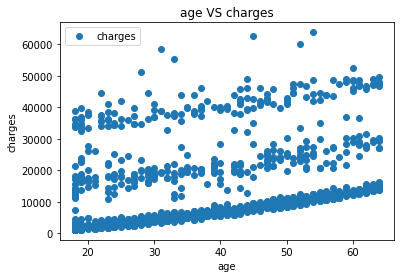

In [22]:
insurance_data.plot(x="age",y="charges",style="o")
plt.title("age VS charges")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

Sex

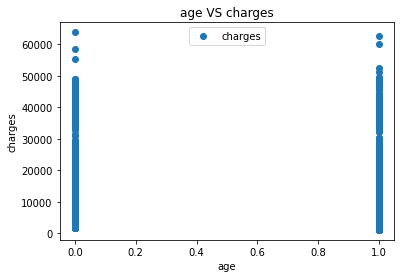

In [23]:
insurance_data.plot(x="sex",y="charges",style="o")
plt.title("age VS charges")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

Bmi

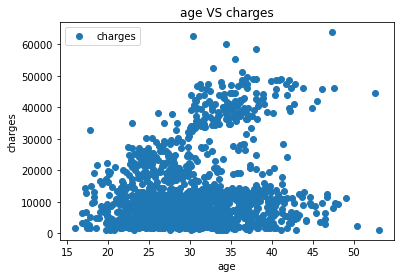

In [24]:
insurance_data.plot(x="bmi",y="charges",style="o")
plt.title("age VS charges")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

Smoker

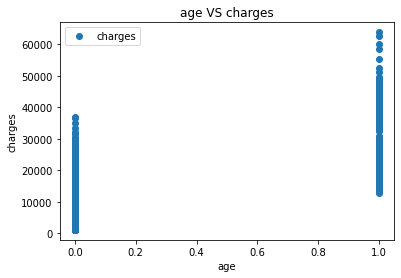

In [25]:
insurance_data.plot(x="smoker",y="charges",style="o")
plt.title("age VS charges")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

**5) Train and Test Split**

In [26]:
X = insurance_data.drop(columns="charges",axis=1)
y = insurance_data["charges"]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**6) Standard Scaler**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.17200124, -1.01609761,  1.48194257, -0.91141505, -0.51027185,
        -0.47327211],
       [ 0.67813421,  0.98415741, -0.15409692, -0.07816881, -0.51027185,
         1.35416008],
       [-1.5089912 ,  0.98415741, -2.42555516, -0.91141505, -0.51027185,
         1.35416008],
       ...,
       [ 1.24255367,  0.98415741,  1.55727572, -0.91141505, -0.51027185,
         1.35416008],
       [-1.36788634, -1.01609761, -1.46915169, -0.91141505,  1.9597397 ,
        -1.3869882 ],
       [ 1.17200124,  0.98415741, -0.79197218, -0.91141505, -0.51027185,
         1.35416008]])

**7) Modelling**

1) Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

2) Support Vector Machine

In [30]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)

SVR()

3) Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
ran_fore = RandomForestRegressor()
ran_fore.fit(X_train,y_train)

RandomForestRegressor()

4) Gradient Boosting Regressor 

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gra_boost = GradientBoostingRegressor()
gra_boost.fit(X_train,y_train)

GradientBoostingRegressor()

**8) Making Prediction**

1) Linear Regression

In [33]:
lin_reg.predict([[19,1,33.770,1,0,3]])

array([4105.42487706])

2) Support Vector Machine

In [34]:
svm.predict([[19,1,33.770,1,0,3]])

array([9376.54929673])

3) Random Forest Regressor

In [35]:
ran_fore.predict([[19,1,33.770,1,0,3]])

array([2467.468363])

4) Gradient Boosting Regressor

In [36]:
gra_boost.predict([[19,1,33.770,1,0,3]])

array([3261.24223059])

**9) Compare Actual and Predicted Scores**

1) Linear Regression

In [37]:
y_pred_1 = lin_reg.predict(X_test)
y_pred_1

array([ 1.49426621e+04,  1.08926217e+04, -2.29432353e+03,  5.89317482e+03,
        8.79675150e+03,  2.47825760e+03,  2.68576938e+04,  1.07167201e+04,
        3.85021565e+03,  1.40639200e+04,  3.71320901e+03,  5.31289486e+03,
        1.63156322e+03,  6.49850620e+03,  9.57710544e+03, -5.50797473e+00,
        3.25291128e+04,  1.71564518e+04,  1.25345762e+04,  9.34850064e+03,
        2.83224051e+04,  2.98619824e+04,  3.05273060e+04,  5.45422106e+03,
        6.51003338e+03,  1.11271435e+04,  7.62021882e+03,  9.76467834e+03,
        8.30708097e+03,  1.15892377e+03,  7.33943868e+03,  3.27764539e+04,
        2.83424778e+03,  3.21353006e+04,  1.12213552e+04,  3.17506170e+03,
        3.38065301e+04,  8.24368800e+03,  3.47308169e+04,  1.21624857e+04,
        5.26445857e+03,  6.51272136e+03,  7.91892247e+03,  1.09074707e+04,
        5.45692023e+03,  6.21003110e+03,  5.83688681e+03,  3.58507821e+04,
        3.83850427e+03,  1.67469099e+04,  6.05330228e+03,  9.98579023e+03,
        4.33374954e+03,  

In [38]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_1})
df

,Actual,Prediction
13,11090.71780,14942.662131
1052,9288.02670,10892.621682
172,1694.79640,-2294.323529
395,7526.70645,5893.174824
934,4673.39220,8796.751499
...,...,...
1297,4340.44090,4345.522081
278,12928.79110,13974.413192
1132,20709.02034,15908.098473
1231,20167.33603,23187.166722


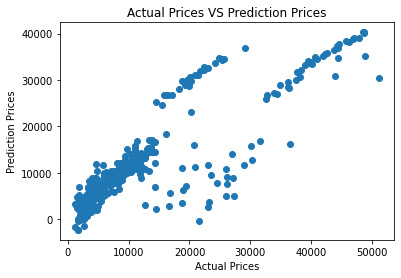

In [39]:
plt.scatter(y_test,y_pred_1)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

2) Support Vector Machine

In [40]:
y_pred_2 = svm.predict(X_test)
y_pred_2

array([9567.08156924, 9528.63306868, 9382.91251329, 9505.93264445,
       9427.83118103, 9379.72898585, 9458.33740139, 9551.62709866,
       9409.06807846, 9577.5922884 , 9392.7042976 , 9440.5261733 ,
       9386.74925323, 9447.3904879 , 9466.65452509, 9401.30972233,
       9515.66496871, 9593.16317461, 9563.38551739, 9522.37327358,
       9377.56006981, 9488.10325575, 9408.22808022, 9446.27722314,
       9401.63811445, 9583.50114878, 9458.65556987, 9572.56361967,
       9501.39735006, 9376.02009075, 9458.53759143, 9560.7204303 ,
       9380.33674018, 9448.34085149, 9562.76010216, 9375.05051901,
       9472.70189576, 9406.05673753, 9411.25719711, 9523.40151151,
       9381.27554213, 9483.40201731, 9496.3320581 , 9544.73206371,
       9414.55756258, 9401.34924451, 9397.29993888, 9493.2583382 ,
       9400.63429606, 9593.08806572, 9418.96424755, 9515.07229844,
       9429.92605114, 9581.87297444, 9419.24559407, 9589.81557308,
       9464.41572801, 9395.09860575, 9379.79604514, 9409.21741

In [41]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_2})
df

,Actual,Prediction
13,11090.71780,9567.081569
1052,9288.02670,9528.633069
172,1694.79640,9382.912513
395,7526.70645,9505.932644
934,4673.39220,9427.831181
...,...,...
1297,4340.44090,9404.603276
278,12928.79110,9582.109506
1132,20709.02034,9571.432058
1231,20167.33603,9380.263926


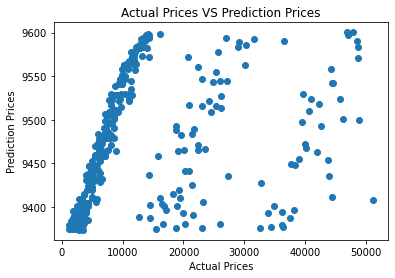

In [42]:
plt.scatter(y_test,y_pred_2)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

3) Random Forest Regressor

In [43]:
y_pred_3 = ran_fore.predict(X_test)
y_pred_3

array([11463.3886479 , 11682.5425913 ,  1750.809162  ,  8922.1974527 ,
        5297.0286041 ,  1906.4161375 , 17115.8283269 , 11523.6389083 ,
        3521.4399681 , 12028.2083164 ,  6104.6135138 ,  5462.329641  ,
        4235.5992996 ,  6098.0869469 ,  6559.3657455 ,  2711.2729375 ,
       27558.913351  , 14632.3429045 , 13576.171156  , 14942.1293044 ,
       36091.5063827 , 20800.3967377 , 38185.5207915 ,  5218.872692  ,
        5484.7406579 , 13351.8560458 ,  7322.8634581 , 13245.4628508 ,
        9023.899118  ,  2874.0124378 ,  6281.447585  , 26891.5148877 ,
        6085.2770942 , 39100.990462  , 15164.253851  ,  1170.703026  ,
       39779.5800995 ,  4256.7526047 , 41360.662234  , 10482.9865595 ,
        5250.4310214 ,  6972.018493  ,  8069.0943371 , 12845.2790785 ,
        4673.0437247 ,  6797.9554443 ,  6865.8071106 , 43849.6514124 ,
        2768.0004665 , 16426.07595   ,  5749.8948168 ,  9859.1916379 ,
       10956.7929769 , 19193.7804523 , 18821.2694955 , 16806.3674685 ,
      

In [44]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_3})
df

,Actual,Prediction
13,11090.71780,11463.388648
1052,9288.02670,11682.542591
172,1694.79640,1750.809162
395,7526.70645,8922.197453
934,4673.39220,5297.028604
...,...,...
1297,4340.44090,6994.177571
278,12928.79110,14313.100040
1132,20709.02034,11390.009438
1231,20167.33603,14782.824974


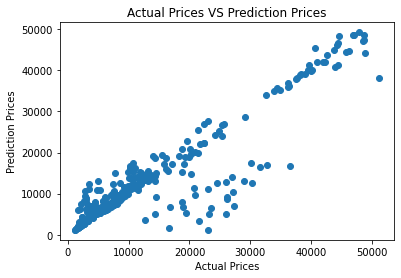

In [45]:
plt.scatter(y_test,y_pred_3)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

4) Gradient Boosting Regressor

In [46]:
y_pred_4 = gra_boost.predict(X_test)
y_pred_4

array([11676.07404822, 11053.19225154,  1383.98124136,  7812.40987033,
        6352.9026156 ,  1785.90942755, 16778.77603011, 11798.06786974,
        4252.228808  , 12790.4226984 , 13484.39653355,  6183.93231676,
        4978.07547757,  4909.82376796,  6989.42811094,  2710.05728783,
       26353.7130453 , 13708.77783371, 12478.34204919, 12400.33626298,
       36800.30851866, 20991.80719755, 37112.63733879,  5458.08728358,
        6071.02316182, 13238.47891   ,  7247.0196432 , 12833.20911822,
        9649.79602721,  4074.83758919,  7413.77333238, 22136.04379264,
        5561.19132827, 38295.94734758, 13284.19427241,  2001.85124696,
       39231.82728428,  5495.10281451, 44446.14273006, 10154.28279783,
        5781.09203546,  6932.29204372,  9464.94943923, 12538.14220043,
        4394.71318846,  6096.55648692,  5477.18106854, 46788.04354621,
        3691.59951831, 16379.36602124,  7427.81999886,  9577.67225905,
        6139.45576844, 16057.17601377, 18002.60145734, 15949.1899217 ,
      

In [47]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_4})
df

,Actual,Prediction
13,11090.71780,11676.074048
1052,9288.02670,11053.192252
172,1694.79640,1383.981241
395,7526.70645,7812.409870
934,4673.39220,6352.902616
...,...,...
1297,4340.44090,5826.887440
278,12928.79110,15210.641070
1132,20709.02034,12226.320133
1231,20167.33603,16627.710753


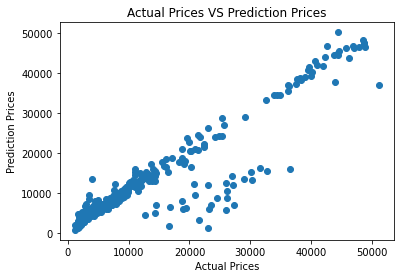

In [48]:
plt.scatter(y_test,y_pred_4)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

Overall Comparision

In [49]:
df = pd.DataFrame({"Actual":y_test,"LR":y_pred_1,"svm":y_pred_2,"RF":y_pred_3,"GR":y_pred_4})
df

,Actual,LR,svm,RF,GR
13,11090.71780,14942.662131,9567.081569,11463.388648,11676.074048
1052,9288.02670,10892.621682,9528.633069,11682.542591,11053.192252
172,1694.79640,-2294.323529,9382.912513,1750.809162,1383.981241
395,7526.70645,5893.174824,9505.932644,8922.197453,7812.409870
934,4673.39220,8796.751499,9427.831181,5297.028604,6352.902616
...,...,...,...,...,...
1297,4340.44090,4345.522081,9404.603276,6994.177571,5826.887440
278,12928.79110,13974.413192,9582.109506,14313.100040,15210.641070
1132,20709.02034,15908.098473,9571.432058,11390.009438,12226.320133
1231,20167.33603,23187.166722,9380.263926,14782.824974,16627.710753


1) Linear Regression

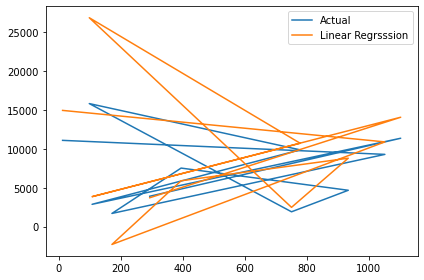

In [50]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["LR"].iloc[0:11],label="Linear Regrsssion")
plt.tight_layout()
plt.legend()

2) Supper Vector Machine

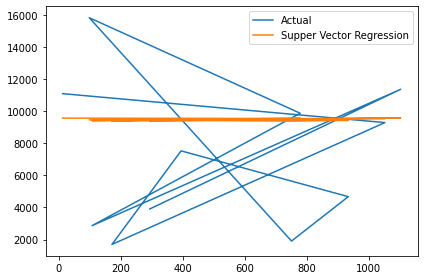

In [51]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["svm"].iloc[0:11],label="Supper Vector Regression")
plt.tight_layout()
plt.legend()

3) Random Forest Regressor

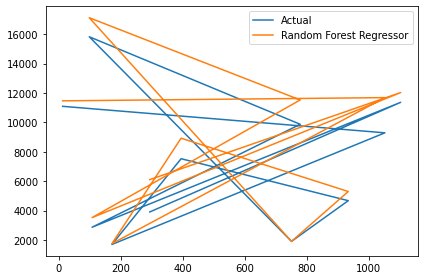

In [52]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["RF"].iloc[0:11],label="Random Forest Regressor")
plt.tight_layout()
plt.legend()

4) Gradient Boosting Regressor

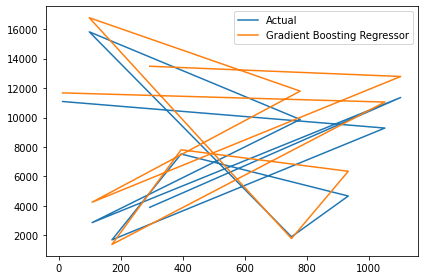

In [53]:
plt.plot(df["Actual"].iloc[0:11],label="Actual")
plt.plot(df["GR"].iloc[0:11],label="Gradient Boosting Regressor")
plt.tight_layout()
plt.legend()

**10) Evaluation Metrics**

1) Linear Regression

In [54]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_1))

R2-Scores:  0.7333883419512954


2) Supper Vector Machine

In [55]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_2))

R2-Scores:  -0.09345691400913969


3) Random Forest Regressor

In [56]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_3))

R2-Scores:  0.8366821831919931


4) Gradient Boosting Regressor

In [57]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_4))

R2-Scores:  0.8473806531403654
